https://www.kaggle.com/zalando-research/fashionmnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.



In [1]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pushpit19jain","key":"b7c5f470a3b48f2bdcf9577295307ba6"}'}

In [2]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d zalando-research/fashionmnist

 99% 68.0M/68.8M [00:02<00:00, 24.2MB/s]
100% 68.8M/68.8M [00:02<00:00, 31.1MB/s]


In [4]:
!unzip /content/fashionmnist.zip

Archive:  /content/fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv("/content/fashion-mnist_train.csv")

In [7]:
df.shape, 28*28

((60000, 785), 784)

In [8]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [9]:
xtrain = df.iloc[:, 1:].values
ytrain = df.iloc[:, 0].values
xtrain.shape, ytrain.shape

((60000, 784), (60000,))

(None, 0)

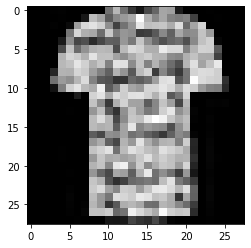

In [10]:
def printImg (img):
  img = img.reshape(28,28)
  plt.imshow(img, cmap="gray")

printImg(xtrain[3]), ytrain[3]

## NEURAL NETWORK

using Keras for deep learning 

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [12]:
# Model Created

input_shape = (784,)
output_shape = 1

model = Sequential()

In [13]:
# first layer

model.add(Dense(units=784, activation="relu", input_shape=input_shape))
# input shape need to be told only for first layer 
# units : no of perceptron

In [14]:
# will create 1start 1hidden and 1 output layer
# second layer (hidden 1)
model.add(Dense(units=256, activation="relu"))

In [15]:
# output layer
model.add(Dense(units=1, activation="softmax"))
# in output layer to differentiate between
# 0, 1 -> use sigmoid
# 0...n -> softmax function

In [16]:
# compiling model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# keras optimizers : https://keras.io/api/optimizers/    will use adam

# when 2 classes  : binary_crossentropy,
# multiple classes : CategoricalCrossentropy class
# https://keras.io/api/losses/

# can change loss to sparse_categorical_crossentropy

# https://keras.io/api/metrics/ 

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 816,657
Trainable params: 816,657
Non-trainable params: 0
_________________________________________________________________


In [18]:
# fitting model on dataset
model.fit(xtrain, ytrain, batch_size=64, epochs=20, validation_split=0.2)

# batch size > 30
# epochs : no of refactoring (forwd + backward propagation)
# validation_split : train and test

# very bad accuracy

Epoch 1/20
750/750 [==============================] - 18s 4ms/step - loss: 0.0000e+00 - accuracy: 0.1013 - val_loss: 0.0000e+00 - val_accuracy: 0.1011
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0995 - val_loss: 0.0000e+00 - val_accuracy: 0.1011
Epoch 3/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0981 - val_loss: 0.0000e+00 - val_accuracy: 0.1011
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1024 - val_loss: 0.0000e+00 - val_accuracy: 0.1011
Epoch 5/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0982 - val_loss: 0.0000e+00 - val_accuracy: 0.1011
Epoch 6/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0999 - val_loss: 0.0000e+00 - val_accuracy: 0.1011
Epoch 7/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 0.

In [19]:
model2 = Sequential()
model2.add(Dense(units=784, activation="relu", input_shape=input_shape))
model2.add(Dense(units=256, activation="relu"))
model2.add(Dense(units=1, activation="softmax"))
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model2.fit(xtrain, ytrain, batch_size=64, epochs=20, validation_split=0.2)
# dont use sparse

Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0995 - val_loss: nan - val_accuracy: 0.0999
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0992 - val_loss: nan - val_accuracy: 0.0999
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.1002 - val_loss: nan - val_accuracy: 0.0999
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.0999
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0999
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.1007 - val_loss: nan - val_accuracy: 0.0999
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0999
Epoch 8/20
750/750 [============================

In [20]:
model3 = Sequential()
model3.add(Dense(units=256, activation="relu", input_dim=784 ))  # 1 row 784 cols
model3.add(Dense(units=256, activation="relu"))
model3.add(Dense(units=1, activation="softmax"))
model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model3.fit(xtrain, ytrain, batch_size=64, epochs=20, validation_split=0.2)


Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.0999
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.1016 - val_loss: nan - val_accuracy: 0.0999
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0976 - val_loss: nan - val_accuracy: 0.0999
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.1017 - val_loss: nan - val_accuracy: 0.0999
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0979 - val_loss: nan - val_accuracy: 0.0999
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.1011 - val_loss: nan - val_accuracy: 0.0999
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.1002 - val_loss: nan - val_accuracy: 0.0999
Epoch 8/20
750/750 [============================

### One Hot Encoding 

In [21]:
# doing one hot encoding because more than 2 classes
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
ytrain = one.fit_transform(ytrain.reshape(-1, 1)).toarray()

In [22]:
ytrain.shape
#original ytrain: [1, 0, 2]
#after one hot encoding :
#    [
#     [0,1,0],
#     [1,0,0],
#     [0,0,1]
#    ]

(60000, 10)

In [23]:
model4 = Sequential()
model4.add(Dense(units=256, activation="relu", input_dim=784 ))  # 1 row 784 cols
model4.add(Dense(units=256, activation="relu"))
model4.add(Dense(units=10, activation="softmax"))
model4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model4.fit(xtrain, ytrain, batch_size=64, epochs=20, validation_split=0.2)


Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 8.3434 - accuracy: 0.7025 - val_loss: 0.7386 - val_accuracy: 0.7812
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.6487 - accuracy: 0.7971 - val_loss: 0.7077 - val_accuracy: 0.7438
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5297 - accuracy: 0.8216 - val_loss: 0.6102 - val_accuracy: 0.8083
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5158 - accuracy: 0.8252 - val_loss: 0.5793 - val_accuracy: 0.8162
Epoch 5/20
750/750 [==============================] - 3s 3ms/step - loss: 0.4845 - accuracy: 0.8336 - val_loss: 0.5835 - val_accuracy: 0.7946
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4750 - accuracy: 0.8363 - val_loss: 0.5132 - val_accuracy: 0.8238
Epoch 7/20
750/750 [==============================] - 3s 3ms/step - loss: 0.4495 - accuracy: 0.8423 - val_loss: 0.5073 - val_accuracy: 0.8370
Epoch 

accuracy (train) : 0.8792 

accuracy (test) : 0.8621   (val_accuracy)

In [24]:
model4.history.history 

{'accuracy': [0.7429375052452087,
  0.7987499833106995,
  0.8184999823570251,
  0.8253541588783264,
  0.8283958435058594,
  0.8365416526794434,
  0.8411458134651184,
  0.8466458320617676,
  0.8533750176429749,
  0.859416663646698,
  0.8603333234786987,
  0.8678333163261414,
  0.8689166903495789,
  0.8732291460037231,
  0.8731874823570251,
  0.8755624890327454,
  0.8767083287239075,
  0.8760833144187927,
  0.8805833458900452,
  0.8806874752044678],
 'loss': [2.868797540664673,
  0.6363667249679565,
  0.5397955775260925,
  0.5117385387420654,
  0.49663639068603516,
  0.4721839725971222,
  0.4501051902770996,
  0.4328673183917999,
  0.40906408429145813,
  0.38529542088508606,
  0.38213610649108887,
  0.3641786277294159,
  0.36070114374160767,
  0.34774431586265564,
  0.3447829484939575,
  0.3404920995235443,
  0.334778755903244,
  0.3420867621898651,
  0.3239278197288513,
  0.32024726271629333],
 'val_accuracy': [0.781166672706604,
  0.7438333630561829,
  0.8082500100135803,
  0.816166639

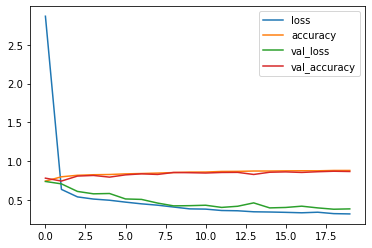

In [25]:
pd.DataFrame (model4.history.history).plot()
plt.show()

At one point generally, the testing loss starts increasing after hitting bottom.

we should stop training at the that point

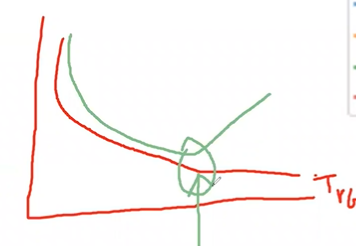

lets do scaling also from 0-255

In [26]:
xtrain2 = xtrain/255.
xtrain2.shape

(60000, 784)

In [27]:
model5 = Sequential()
model5.add(Dense(units=256, activation="relu", input_dim=784 ))  # 1 row 784 cols
model5.add(Dense(units=256, activation="relu"))
model5.add(Dense(units=10, activation="softmax"))
model5.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model5.fit(xtrain, ytrain, batch_size=64, epochs=20, validation_split=0.2)


Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 7.9537 - accuracy: 0.7077 - val_loss: 0.7434 - val_accuracy: 0.7597
Epoch 2/20
750/750 [==============================] - 3s 3ms/step - loss: 0.6837 - accuracy: 0.7899 - val_loss: 0.5720 - val_accuracy: 0.8129
Epoch 3/20
750/750 [==============================] - 3s 3ms/step - loss: 0.5689 - accuracy: 0.8096 - val_loss: 0.6039 - val_accuracy: 0.8098
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5124 - accuracy: 0.8250 - val_loss: 0.5621 - val_accuracy: 0.8236
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5413 - accuracy: 0.8201 - val_loss: 0.4836 - val_accuracy: 0.8389
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4711 - accuracy: 0.8381 - val_loss: 0.5029 - val_accuracy: 0.8288
Epoch 7/20
750/750 [==============================] - 3s 3ms/step - loss: 0.4609 - accuracy: 0.8421 - val_loss: 0.5090 - val_accuracy: 0.8332
Epoch 

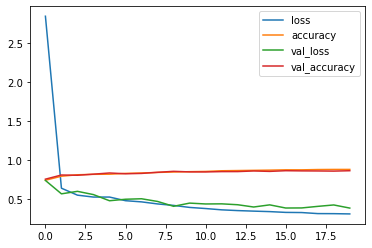

In [28]:
pd.DataFrame (model5.history.history).plot()
plt.show()

### Dropout

used when model starts overfitting
(v good on train , bad score on test)

so can add dropout layer after every layer

In [29]:
model6 = Sequential()

model6.add(Dense(units=256, activation="relu", input_dim=784 ))  # 1 row 784 cols
model6.add(Dropout(rate=0.25)) # requires rate 0-1

model6.add(Dense(units=256, activation="relu"))
model6.add(Dropout(rate=0.25))

model6.add(Dense(units=10, activation="softmax"))
model6.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

print(model6.summary())

model6.fit(xtrain, ytrain, batch_size=128, epochs=20, validation_split=0.2)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 11.6416 - accuracy: 0.5238 - val_lo

In [30]:
model7 = Sequential()
model7.add(Dense(units=256, activation="relu", input_shape=(784,) ))  # 1 row 784 cols
model7.add(Dense(units=256, activation="relu"))
model7.add(Dense(units=10, activation="softmax"))
model7.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model7.fit(xtrain, ytrain, batch_size=64, epochs=20, validation_split=0.2)


Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 10.4529 - accuracy: 0.7018 - val_loss: 0.8214 - val_accuracy: 0.7853
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.7285 - accuracy: 0.7893 - val_loss: 0.6134 - val_accuracy: 0.8096
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5666 - accuracy: 0.8111 - val_loss: 0.6193 - val_accuracy: 0.8045
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5110 - accuracy: 0.8263 - val_loss: 0.5858 - val_accuracy: 0.8051
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4693 - accuracy: 0.8373 - val_loss: 0.5554 - val_accuracy: 0.8227
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4821 - accuracy: 0.8349 - val_loss: 0.5369 - val_accuracy: 0.8276
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4423 - accuracy: 0.8422 - val_loss: 0.5190 - val_accuracy: 0.8281
Epoch

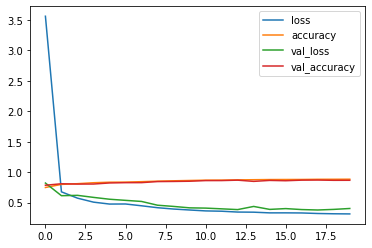

In [32]:
pd.DataFrame(model7.history.history).plot()
plt.show()